In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv("/Users/tobiaochsner/Documents/Thesis/CCD/out.out", names=["split", "b", "bd", "mu", "sigma", "beta"])

In [51]:
df.describe()

,split,b,bd,mu,sigma,beta
count,315009.000000,315009.000000,315009.000000,315009.000000,315009.000000,3.150090e+05
mean,145.404014,-5.283544,-1.329048,-5.262684,0.775261,1.554947e-02
std,88.500408,1.417007,2.521943,1.111878,0.552582,1.734726e-18
min,0.000000,-17.347838,-17.347838,-9.857037,0.000000,1.554947e-02
25%,66.000000,-6.100213,0.000000,-6.126685,0.188706,1.554947e-02
50%,148.000000,-5.161079,0.000000,-5.419076,0.726002,1.554947e-02
75%,225.000000,-4.317114,0.000000,-4.445691,1.214746,1.554947e-02
max,278.000000,-2.422783,0.000000,-3.004074,8.883125,1.554947e-02


In [50]:
len(df)

315009

In [55]:
df_nz

,split,b,bd,mu,sigma,beta


In [56]:
df_nz = df[df.bd < 0]

In [58]:
df_nz.describe()

,split,b,bd,mu,sigma,beta
count,72871.000000,72871.000000,72871.000000,72871.000000,72871.000000,7.287100e+04
mean,127.078509,-5.334630,-5.745249,-5.244453,0.985451,1.554947e-02
std,84.720993,1.348129,1.456645,0.922299,0.513121,5.204206e-18
min,1.000000,-15.625153,-17.347838,-9.857037,0.000000,1.554947e-02
25%,53.000000,-6.054589,-6.601670,-5.945107,0.579917,1.554947e-02
50%,100.000000,-5.228883,-5.718787,-5.195769,1.074220,1.554947e-02
75%,197.000000,-4.500988,-4.859698,-5.112639,1.337596,1.554947e-02
max,277.000000,-2.655408,-2.612902,-3.275818,3.951697,1.554947e-02


In [57]:
df_nz.groupby("split").apply(lambda x: x.b.cov(x.bd)).mean()

/Users/tobiaochsner/Documents/Thesis/Validation/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1675: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
/Users/tobiaochsner/Documents/Thesis/Validation/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/tobiaochsner/Documents/Thesis/Validation/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_52244/3864165322.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after

np.float64(0.03367356245876712)

In [40]:
cov_beta = df.groupby("split").apply(lambda x: len(x) * x.bd.var()).sum() / len(df)
var_beta = df.b.cov(df.bd)
var_beta / cov_beta

/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_52244/3742312304.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cov_beta = df.groupby("split").apply(lambda x: len(x) * x.bd.var()).sum() / len(df)


np.float64(-0.26970484391118654)

In [32]:
df.b.cov(df.bd)

np.float64(-0.06566254309477647)

In [8]:
sns.scatterplot(
    x=[d[0] for d in data],
    y=[d[1] for d in data],
)
plt.title("Max. Log-Likelihood for Different Betas")
plt.xlabel("Beta")
plt.ylabel("Max. Log-Likelihood (+C)")

NameError: name 'data' is not defined

In [10]:
nominator = (df.b - df.mu) * df.bd / df.sigma
denominator = (df.bd * df.bd) / df.sigma

nominator.sum() / denominator.sum()

/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_52244/1058977764.py:4: RuntimeWarning: invalid value encountered in scalar divide
  nominator.sum() / denominator.sum()


np.float64(nan)

In [191]:
import scipy.stats as stats
from scipy.optimize import minimize

In [268]:
df["p"] = np.log(stats.norm.pdf(df.b, df.mu + df.beta * df.bd, np.power(df.sigma, 0.5)))

In [273]:
-330629 < -330629

False

In [251]:
sor = df.sort_values("p")

In [264]:
sor

,split,b,bd,mu,sigma,beta,p
145933,126,-6.418202,-7.148495,-6.361683,0.00100,0.007958,-inf
193973,201,-7.018995,-8.199940,-6.954163,0.00100,0.007958,-inf
154779,145,-6.349483,-7.431670,-6.290725,0.00100,0.007958,-inf
176411,169,-6.130917,-8.202414,-6.066065,0.00100,0.007958,-inf
53011,43,-4.865554,-6.138823,-4.817018,0.00100,0.007958,-inf
...,...,...,...,...,...,...,...
37460,25,-5.238035,0.000000,-5.238035,0.00100,0.007958,2.534939
78222,62,-7.820343,0.000000,-7.820343,0.00100,0.007958,2.534939
53139,48,-5.229283,0.000000,-5.229283,0.00100,0.007958,2.534939
117797,97,-8.164148,0.000000,-8.182044,0.00032,0.007958,2.604234


In [266]:
stats.norm.pdf(-6.418202, -4.429553, np.power(0.001000, 0.5))

np.float64(0.0)

In [267]:
-6.361683	 + 0.007958*-7.148495

-6.41857072321

In [1]:
df

NameError: name 'df' is not defined

In [1]:
import pandas as pd

In [2]:
pd.read_csv("/Users/tobiaochsner/Documents/Thesis/Validation/data/validation/ds1-1_logs_mu-sigma-beta-old-small-old-big.log")

,state,posterior
0,STATE_0,2.699787e+24
1,STATE_100,1.541823e+18
2,STATE_200,1.922199e+16
3,STATE_300,1.833252e-01
4,STATE_400,5.043226e+09
...,...,...
99996,STATE_9999600,3.125039e+26
99997,STATE_9999700,7.391271e+34
99998,STATE_9999800,3.726645e+23
99999,STATE_9999900,6.909649e-09


In [8]:
import scipy.stats as stats
stats.norm.pdf(-4.364048610428304, -4.6187572772113965, 0.338822167158795)


np.float64(0.887611897814502)

In [1]:
import scipy.stats as stats
import numpy as np
import seaborn as sns

<Axes: ylabel='Count'>

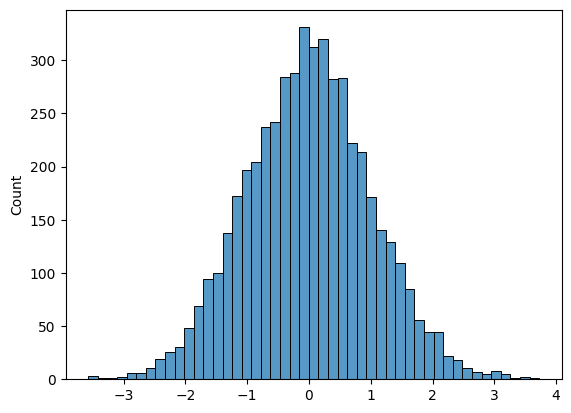

In [2]:
norm = np.random.normal(0, 1, 5000)
sns.histplot(norm)

In [9]:
norm = stats.lognorm.pdf(s=1.0, scale=np.exp(1.0), size=5000) 
sns.histplot(np.log(norm), stat="density")

TypeError: rv_continuous.pdf() missing 1 required positional argument: 'x'

In [21]:
stats.lognorm.pdf(1.0, s=2.0, scale=np.exp(3.0)) 

np.float64(0.06475879783294586)

In [20]:
stats.norm.pdf(np.log(1.0), 3.0, 2.0) 

np.float64(0.06475879783294587)